# Homework 1

## Pair Programming Group Number: 12
## Members of Team: Jenny Fotso & Medhavie Agnihotri


### Data maniupuation and Visualization!

In our first assignment you will practice manipuating and visualizing data from a real wold data set, Melbourne Australia home sales records. 

### The Data

Was taken from a Kaggle competition, and came with the following descriptions:
Content & Acknowledgements

```
This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

….Now with extra data including including property size, land size and council area, you may need to change your code!

Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory
```


## Q1 - Loading Data
Run the following code section to load dataset into a pandas DataFrame named `df`. If you need to look up other
syntax on how to read csv files you can find it [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [9]:
# remember to type in your standard library import for pandas first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://gist.githubusercontent.com/TieJean/ba718aac753c2f90e3d4e040d8f7d982/raw/2aca4164b087fa86721e877b4f1a6bd46d687035/melb_data.csv'

df = pd.read_csv(url)

## Q2 - How many unique suburbs are there?

Are there any pandas DataFrame operations that can do this for you?

[This](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html) function might help. 

In [10]:
df['Suburb'].nunique()

314

In [11]:
#len(df['Suburb'].drop_duplicates())

## Q3 - How many unique properties are there?

If you forget the names of the columns you can always type:

`df.columns` 

in a cell by itself to see this list of column names.

In [12]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [13]:
df['Type'].nunique()

3

In [14]:
group = df.groupby(["Address","Suburb","Postcode"])

print("There are " + str(len(group)) + " unique properties.")

There are 13466 unique properties.


## Q4 - What is the mean price of a property in the Kensington suburb?

You are getting the hang of reading the documentation!  Try finding the function
for mean yourself at the [root page](https://pandas.pydata.org/pandas-docs/stable/index.html) of the documentation.

In [15]:
# select only the Kensington neighborhood to work with
df_ken = df[ df['Suburb'] == 'Kensington' ]

# find the mean of the price column in the selected neighborhood
df_ken['Price'].mean()

831667.4358974359

## Q5 - What percentage of properties contain a YearBuilt value?

In [16]:
# get the total amount of properties
total = len(df)

# get the amount of properties where value is nan
nan = len(df[df['YearBuilt'].isnull()])

# then do the math
n = 100 - (nan*100)/total
print(n)


60.41973490427099


## Q6 - Plot the Landsize as a histogram using 20 bins. Say something interesting about the graph.

Matplotlib is [here](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) to help. 

In data visualization we discuss the "Ink Ratio" of creating graphics.  If you use the definalt bin sizes of the matplotlib histogram function, you will find that the histogram is not very informative.  Use the documentation to guide you to adjust the width of the bins in the histogram to make one _really_ wide bin on the right, and the rest of the bins equally distributed where most of the data resides. 

Text(1500, 500, 'Last bin is properties > 1900')

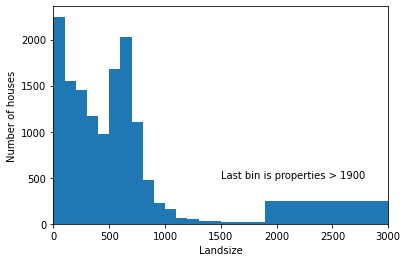

In [17]:
scale = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, df['Landsize'].max()]
plt.hist(df['Landsize'], bins=scale)
plt.xlabel('Landsize')
plt.ylabel('Number of houses')
plt.xlim([0, 3000])
plt.text(1500, 500, 'Last bin is properties > 1900')

## Q7 - Plot a scatter plot of price as a function of BuildingArea using only rows that have a valid BuildingArea value

Break this down into slicing the DataFrame first, then creating the visualization.  There are both `plot` and `scatter` functions in the matplotlib library that can help here.  You'll notice there is more than one way to do a thing so much in computer science 😄

If you have to change your axes and end up excluding some points to make the data more visible, then annotate the number of points excluded in the graph. 

Text(1750.0, 8.0, 'Four extreme points were excluded from the graph, find them in the next code box')

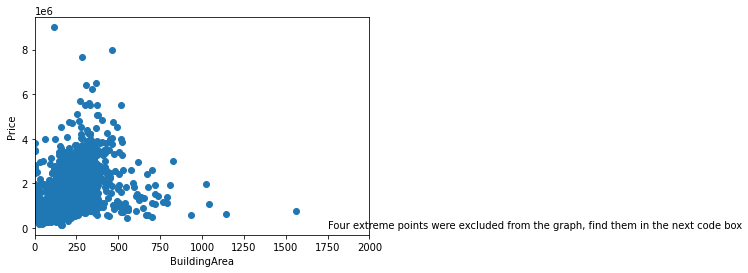

In [18]:
slice = df[['BuildingArea', 'Price']].dropna()
plt.scatter(slice[['BuildingArea']], slice[['Price']])
plt.xlim(0,2000)
plt.xlabel('BuildingArea')
plt.ylabel('Price')
plt.annotate('Four extreme points were excluded from the graph, find them in the next code box', (1750.0, 8.0)) 

In [19]:
#these four points were excluded so we could zoom in and extract more Information from the graph
slice[slice['BuildingArea'] > 2000]

,BuildingArea,Price
1484,6791.0,1280000.0
1588,3112.0,2608000.0
2560,3558.0,930000.0
13245,44515.0,1355000.0


## Q8 - List the top 10 SellerG, and what percentage of properties they have listed 

I'm going to assume that the SellerG column is the name of the seller group, so "realtor" in US parlance.  So, that column is interpreted as the seller that listed the property.

Check out the function `value_counts` in pandas documentation. 

In [20]:
df['SellerG'].value_counts().nlargest(10)

Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
Marshall          659
Buxton            632
Biggin            393
Brad              342
Fletchers         301
Name: SellerG, dtype: int64

In [21]:
top_ten = df['SellerG'].value_counts().nlargest(10)
top_ten/13580

Nelson           0.115243
Jellis           0.096907
hockingstuart    0.085935
Barry            0.074448
Ray              0.051620
Marshall         0.048527
Buxton           0.046539
Biggin           0.028940
Brad             0.025184
Fletchers        0.022165
Name: SellerG, dtype: float64

In [22]:
'''
Nelson  listed 11.5243% of properties
Jellis listed 9.6907% of properties
Hockingstuart listed 8.5935% of properties
Barry listed 7.4448% of properties
Ray listed 5.1620% of properties
Marshall listed 4.8527% of properties
Bruxton listed 4.6539% of properties
Biggin listed 2.8940% of properties
Brad listed 2.5184% of properties
Fletchers listed 2.2165% of properties
'''

'\nNelson  listed 11.5243% of properties\nJellis listed 9.6907% of properties\nHockingstuart listed 8.5935% of properties\nBarry listed 7.4448% of properties\nRay listed 5.1620% of properties\nMarshall listed 4.8527% of properties\nBruxton listed 4.6539% of properties\nBiggin listed 2.8940% of properties\nBrad listed 2.5184% of properties\nFletchers listed 2.2165% of properties\n'

## Q9 - Fix a problem
Your boss has told you that the number of rooms was calculated incorrectly systematically across the entire data set.  Add one room to the Rooms column using two methods:

 - a for loop, and
 - using a single statement
 
Save those DataFrames into the variables `df1` and `df2`.  (We don't use these again, for the next questions just continue using `df`)

Watch out that you don't accidentally change the original DataFrame using a shallow copy.

In [23]:
# Create two new deep copies of the data frame
df1 = df.copy(deep=True)
df2 = df.copy(deep=True)

for i in range(len(df1)):
    df2["Rooms"] += 1

In [24]:
df["Rooms"].head()

0    2
1    2
2    3
3    3
4    4
Name: Rooms, dtype: int64

In [25]:
df1["Rooms"].head()

0    2
1    2
2    3
3    3
4    4
Name: Rooms, dtype: int64

In [26]:
df2["Rooms"].head()

0    13582
1    13582
2    13583
3    13583
4    13584
Name: Rooms, dtype: int64

## Q10- What is the Address of the earliest built house in the data set?

This will exercise your DataFrame slicing ability. 

In [27]:
earliest_house = df[df["YearBuilt"] == df["YearBuilt"].min()]
print( earliest_house["Address"].item() )

5 Armstrong St


## Q11 - Save a file 

The council member for Melbourne has asked for the information for their district.  Assume that there are legal restrcitions and we can only provide the council member the Suburb, Price, and Date from the CouncilArea "Melbourne" to the council person.  Export the file with only the allowed columns, and do not write and index column.

The other half of `read_csv`, is `to_csv`.  Make sure you follow the documentation and only include the columns asked for in the output.

In [28]:
df_district = df[ df['CouncilArea'] == 'Melbourne'].copy()

In [29]:
df_council = df_district[['Suburb', 'Price', 'Date']]
df_council

,Suburb,Price,Date
2644,Flemington,957000.0,22/05/2016
3506,Kensington,785000.0,3/09/2016
3507,Kensington,852000.0,3/09/2016
3508,Kensington,1037000.0,3/09/2016
3509,Kensington,775000.0,3/12/2016
...,...,...,...
12073,Melbourne,565000.0,29/07/2017
12074,Melbourne,540000.0,29/07/2017
12104,North Melbourne,681000.0,29/07/2017
12105,North Melbourne,1803000.0,29/07/2017


In [30]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/CS329E_data_analytics")

Mounted at /content/drive


In [31]:
df_council.to_csv('hw1.csv')